# **Analise de Queimadas** <p>
**Feito por: @DAVID FERREIRA ** - [Linkedin]( https://www.linkedin.com/in/david-ferreira-864117202/ ) <p>

# **incêndios florestais no Brasil** <p>
Os incêndios florestais são um grave problema para a preservação das Florestas Tropicais. Compreender a frequência de incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los.
O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.

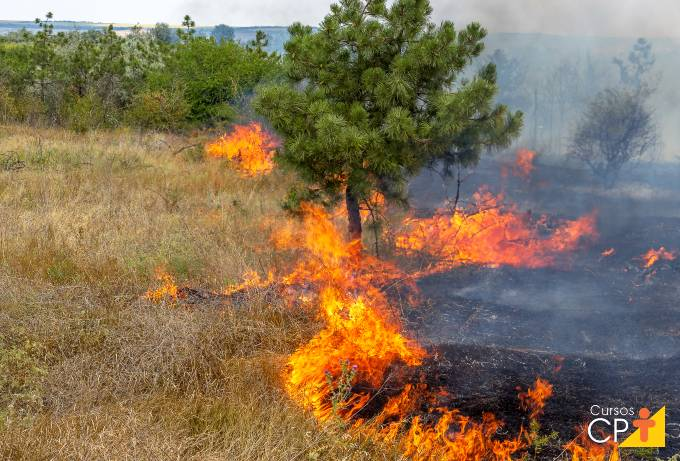


# **Base de Dados**
[Link do Download](https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing)

In [13]:
#libs Necessárias


#Libs para Modelagem e Matrizes
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


#Libs para analises graficas
import matplotlib.pyplot as plt
import seaborn as sns

#lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings("ignore")

In [14]:
# Lendo dados
Base_Dados = pd.read_csv('./Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [15]:
Base_Dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

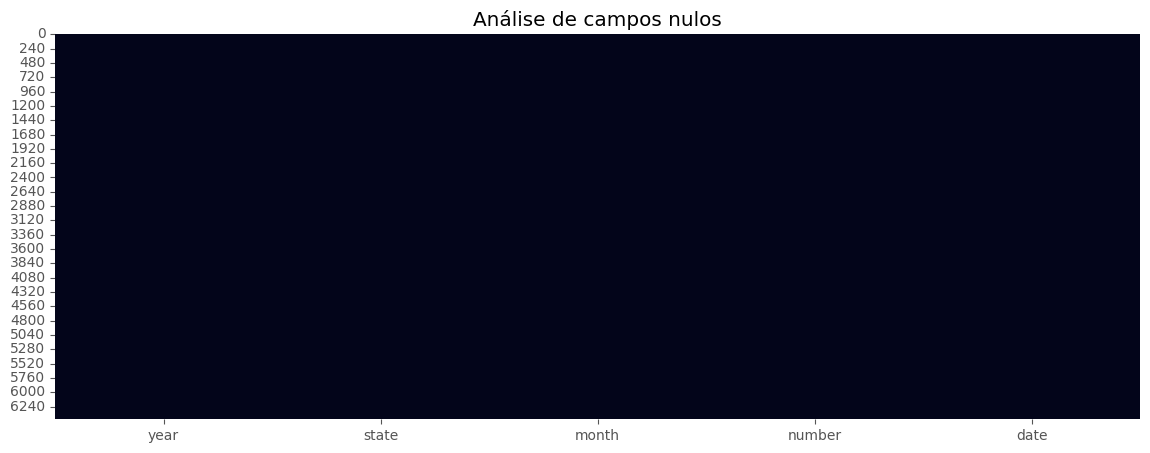

In [16]:
# Nulos Plot
plt.figure( figsize=(14,5) )
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [17]:
# Estatística
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [18]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [19]:
#campos unicos
Base_Dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

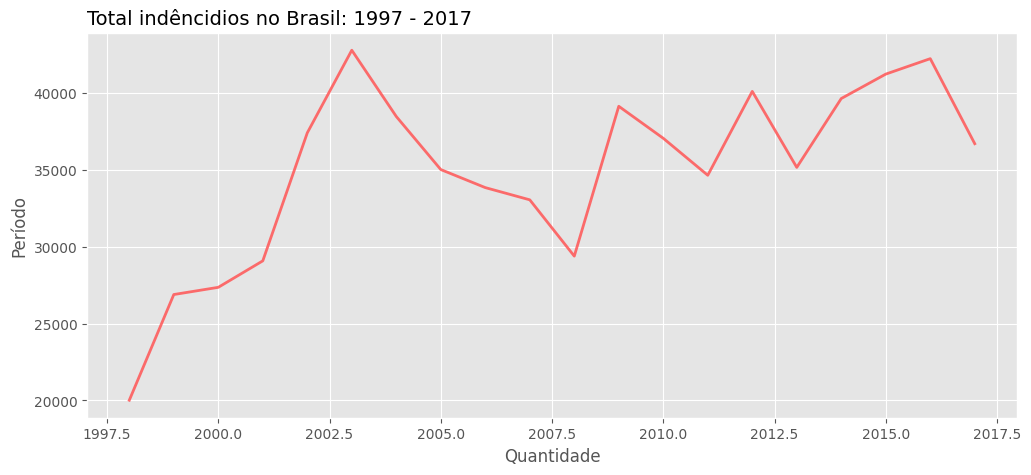

In [20]:
# analise por ano dos incendios
Analise = Base_Dados.groupby( by=['year'] ).sum().reset_index()

Analise.head()

# tamanho
plt.figure(figsize=(12, 5))

plt.style.use('ggplot')

# Grafico
plt.title( 'Total indêncidios no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

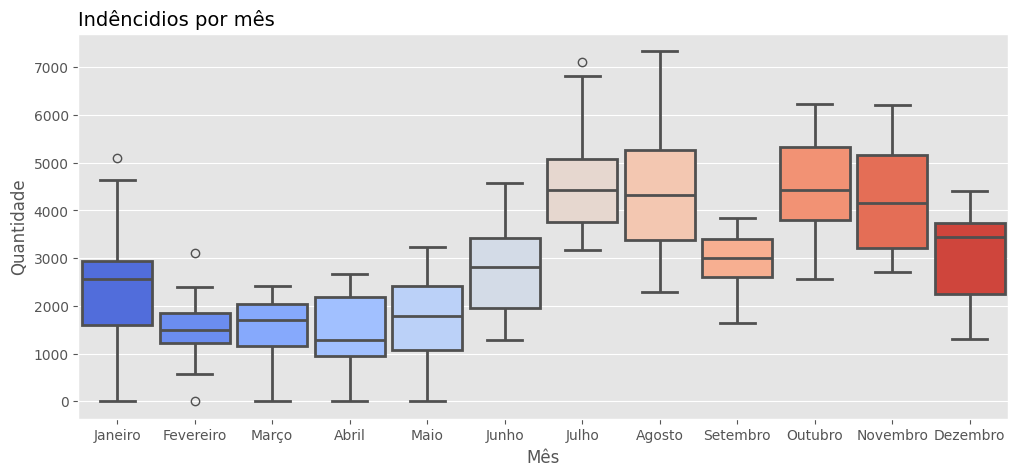

In [21]:
# analise por ano dos incendios
Analise_02 = Base_Dados.groupby( by=['year', 'month'] ).sum().reset_index()
Analise_02.head()

# Tamanho
plt.figure(figsize=(12, 5))

# Grafico
plt.title( 'Indêncidios por mês', loc='left', fontsize=14 )
sns.boxplot( data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Quantidade');


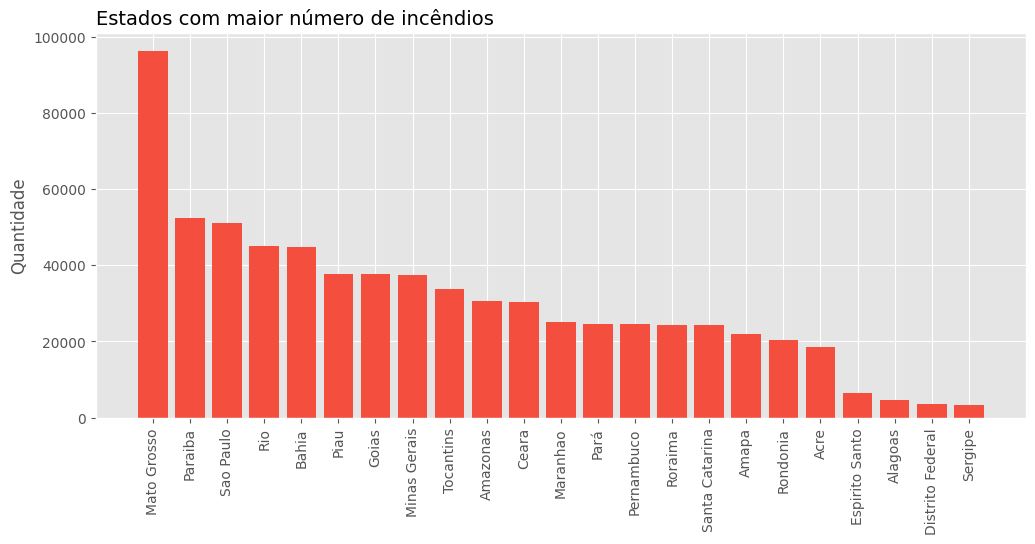

In [22]:
# analise por ano dos incendios
Analise_03 = Base_Dados.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False )
Analise_03.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Estados com maior número de incêndios', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_03.state, Analise_03['number'], color='#f44e3f' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 );

In [23]:
import plotly.graph_objects as go

# Lista dos TOP 10 estados
Lista_TOP10 = Analise_03['state'][0:10].values

# Criando figura
fig = go.Figure()

# Loop para adicionar cada estado
for estado in Lista_TOP10:
    Filtro = Base_Dados[Base_Dados['state'] == estado]
    Analise_Local = Filtro.groupby('year')['number'].sum().reset_index()

    fig.add_trace(
        go.Scatter(
            x=Analise_Local['year'],
            y=Analise_Local['number'],
            mode='lines+markers',
            name=estado
        )
    )

# Layout interativo
fig.update_layout(
    title='Top 10 Estados com Incêndios (Interativo)',
    xaxis_title='Período',
    yaxis_title='Número de Incêndios',
    width=1150,
    height=500,
    legend_title_text='Estado',
    template='plotly_white'
)

fig.show()


In [24]:
# Plot Geográfico

# Gerando os estados
Estados = Analise_03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [25]:
# Fazendo o plot
import plotly.express as px

# Mapa de CAlor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='open-street-map'
)

In [26]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# ---------------------- Lendo dados ----------------------
Base_Dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

# ---------------------- Preparando dados ----------------------
# Gráfico 1: Total de incêndios por ano
Analise = Base_Dados.groupby('year')['number'].sum().reset_index()

# Gráfico 2: Incêndios por mês
Analise_02 = Base_Dados.groupby(['year','month'])['number'].sum().reset_index()
meses_ordenados = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho',
                   'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
Analise_02['month'] = pd.Categorical(Analise_02['month'], categories=meses_ordenados, ordered=True)

# Gráfico 3: Estados com mais incêndios
Analise_03 = Base_Dados.groupby('state')['number'].sum().reset_index().sort_values('number', ascending=False)
top10_estados = Analise_03['state'].head(10).values

# Gráfico 5: Mapa geográfico
lat = [-8.77, -9.71, 1.41, -3.07, -12.96, -3.71, -15.83, -19.19, -16.64, -2.55,
       -12.64, -18.10, -7.06, -5.53, -8.28, -8.28, -22.84, -11.22, 1.89, -27.33,
       -23.55, -10.90, -10.25]
lon = [-70.55, -35.73, -51.77, -61.66, -38.51, -38.54, -47.86, -40.34, -49.31, -44.30,
       -55.42, -44.38, -35.55, -52.29, -35.07, -43.68, -43.15, -62.80, -61.22, -49.44,
       -46.64, -37.07, -48.25]
Analise_Geografica = pd.DataFrame({'state': Analise_03['state'], 'Latitude':lat, 'Longitude':lon, 'Incêndios':Analise_03['number']})

# ---------------------- Criando dashboard interativo ----------------------
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5,0.5],
    row_heights=[0.4,0.4],
    specs=[[{"type":"xy"}, {"type":"xy"}],
           [{"type":"xy"}, {"type":"xy"}]],
    subplot_titles=("Total de Incêndios por Ano",
                    "Incêndios por Mês",
                    "Estados com Maior Número de Incêndios",
                    "Top 10 Estados por Ano")
)

# --- Gráfico 1 ---
fig.add_trace(
    go.Scatter(
        x=Analise['year'],
        y=Analise['number'],
        mode='lines+markers',
        name='Total Anual',
        line=dict(color='#FF5555'),
        showlegend=False   # <<< remove filtro desse gráfico
    ),
    row=1, col=1
)


# --- Gráfico 2 ---
for mes in meses_ordenados:
    dados_mes = Analise_02[Analise_02['month']==mes]
    fig.add_trace(
        go.Box(
            y=dados_mes['number'],
            name=mes,
            boxpoints='all',
            marker_color='lightblue',
            line=dict(width=1),
            showlegend=False   # <<< remove filtro desse gráfico
        ),
        row=1, col=2
    )



# --- Gráfico 3 ---
fig.add_trace(
    go.Bar(
        x=Analise_03['state'],
        y=Analise_03['number'],
        marker_color='red',
        showlegend=False   # <<< remove filtro desse gráfico
    ),
    row=2, col=1
)


# --- Gráfico 4 ---
for estado in top10_estados:
    dados_estado = Base_Dados[Base_Dados['state']==estado].groupby('year')['number'].sum().reset_index()
    fig.add_trace(
        go.Scatter(
            x=dados_estado['year'],
            y=dados_estado['number'],
            mode='lines+markers',
            name=estado,
            showlegend=False   # <<< remove filtro desse gráfico
        ),
        row=2, col=2
    )


# --- Layout geral ajustado ---
fig.update_layout(
    height=900,  # aumentei para caber as legendas
    width=1150,
    title_text="Dashboard Interativo de Incêndios Florestais no Brasil (1997-2017)",
    showlegend=True
)

# --- Posicionando legendas abaixo de cada gráfico ---
fig.update_layout(
    legend=dict(
        orientation="h",   # horizontal
        yanchor="top",
        xanchor="center"
    )
)

# Legenda Gráfico 1 (row=1,col=1)
fig.update_layout(
    legend=dict(
        orientation="h",
        x=0.20,   # posição horizontal
        y=0.45    # posição vertical logo abaixo do subplot
    )
)

# Legenda Gráfico 2 (row=1,col=2)

# Legenda Gráfico 4 (row=2,col=2)

# Exibindo os 4 primeiros gráficos
fig.show()

# --- Gráfico 5: Mapa geográfico interativo (ocupando toda largura) ---
fig_mapa = px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-40.5555),
    zoom=3,
    mapbox_style='open-street-map',
    title='Mapa Geográfico dos Incêndios no Brasil'
)
fig_mapa.update_layout(height=500, width=1150)
fig_mapa.show()
